Load best model

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
best_model = "./model/checkpoints/efficient_net/cn_ocr_eff.keras"
# best_simple_model = "./model/checkpoints/simple/cn_ocr_simple.keras"
model = keras.models.load_model(best_model)
# model.summary()

2024-10-29 20:25:38.743119: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-10-29 20:25:38.743149: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-10-29 20:25:38.743156: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-10-29 20:25:38.743188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-29 20:25:38.743201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Évaluation

In [3]:
# Définir les paramètres de l'image
IMG_SIZE = 224  # Taille attendue par EfficientNetB0

# Charger le modèle sauvegardé
def load_best_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

# Fonction de prétraitement des images (même prétraitement que lors de l'entraînement)
def preprocess_image(img):
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionner à 224 x 224
    img = tf.image.grayscale_to_rgb(img)  # Convertir en RGB si nécessaire
    return img

# Charger le dataset de test et le prétraiter
def load_test_dataset(test_path, batch_size=32):
    def parse_image(record):
        features = tf.io.parse_single_example(record, {
            'width': tf.io.FixedLenFeature([], tf.int64),
            'height': tf.io.FixedLenFeature([], tf.int64),
            'label': tf.io.FixedLenFeature([], tf.int64),
            'image': tf.io.FixedLenFeature([], tf.string),
        })
        img = tf.io.decode_raw(features['image'], tf.uint8)
        img = tf.reshape(img, (features['width'], features['height'], 1))
        img = preprocess_image(img)
        label = features['label']
        return img, label

    dataset = tf.data.TFRecordDataset([test_path])
    dataset = dataset.map(parse_image).batch(batch_size)
    return dataset

# Évaluer le modèle
def evaluate_model(model, test_dataset):
    results = model.evaluate(test_dataset)
    print(f"Test Loss: {results[0]}")
    print(f"Test Accuracy: {results[1]}")


In [4]:
# Chemin du modèle et des données
test_data_path = "data/test.tfrecord"

# Charger le dataset de test
test_dataset = load_test_dataset(test_data_path, batch_size=32)

# Évaluer le modèle
evaluate_model(model, test_dataset)

2024-10-29 20:25:41.045685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7000/7000 [==============================] - 632s 90ms/step - loss: 0.3423 - accuracy: 0.9214
Test Loss: 0.3422749936580658
Test Accuracy: 0.92144775390625


2024-10-29 20:36:12.421688: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5268286440331993778
2024-10-29 20:36:12.421700: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15968872397038754769
2024-10-29 20:36:12.422093: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13935095287350336630


Prédiction

Loaded 3755 characters.
Found 70 images.
Predicting image: ./Char/img_10.jpg


2024-10-29 20:48:56.682958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
Top 3 predictions: ['晶', '届', '陌'] with probabilities [0.25659254, 0.19770625, 0.1630598]


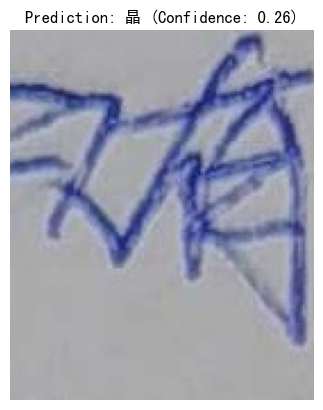

Predicting image: ./Char/img_38.jpg
1/1 [==============================] - 0s 26ms/step
Top 3 predictions: ['晶', '昌', '冒'] with probabilities [0.4245352, 0.27021837, 0.13286257]


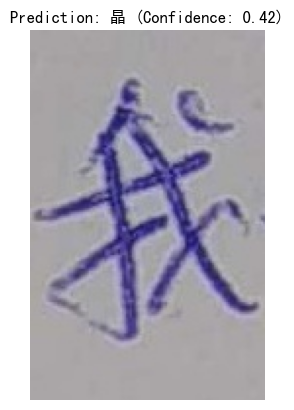

Predicting image: ./Char/img_1.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['盟', '一', '冒'] with probabilities [0.29071295, 0.28144073, 0.06950221]


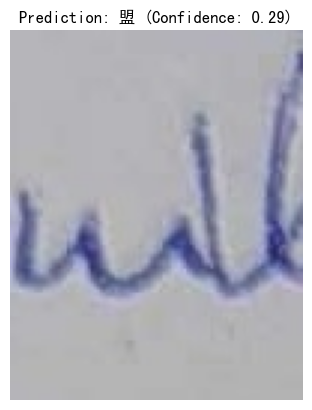

Predicting image: ./Char/img_0.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['冒', '旬', '旨'] with probabilities [0.6414842, 0.095353484, 0.035822064]


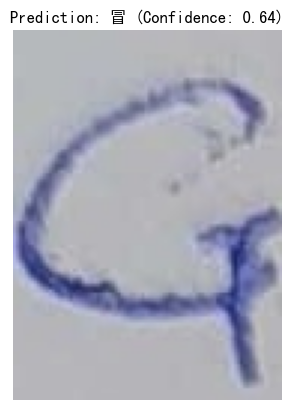

Predicting image: ./Char/img_39.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['冒', '昌', '帽'] with probabilities [0.41277125, 0.2754175, 0.14138186]


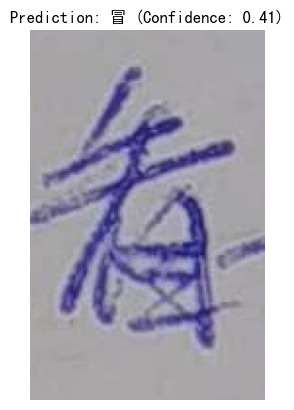

Predicting image: ./Char/img_11.jpg
1/1 [==============================] - 0s 38ms/step
Top 3 predictions: ['冒', '一', '晶'] with probabilities [0.32445797, 0.26836696, 0.14870788]


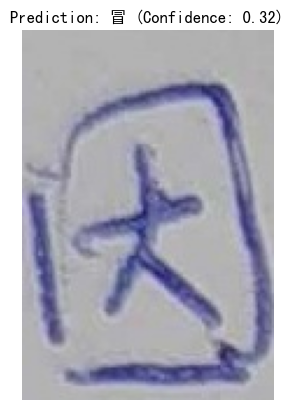

Predicting image: ./Char/img_13.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['冒', '胃', '帽'] with probabilities [0.79841894, 0.09662358, 0.03917379]


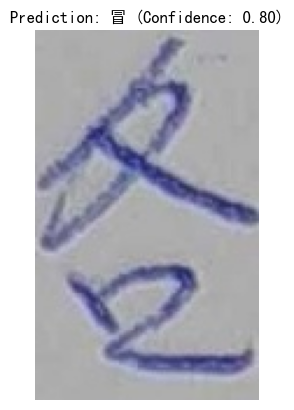

Predicting image: ./Char/img_2.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['盟', '猖', '一'] with probabilities [0.4336574, 0.12301648, 0.11335485]


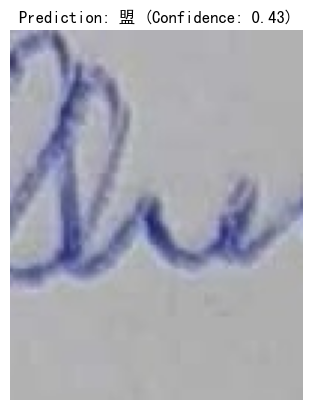

Predicting image: ./Char/img_3.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['猖', '昌', '盟'] with probabilities [0.5203739, 0.120873965, 0.07352301]


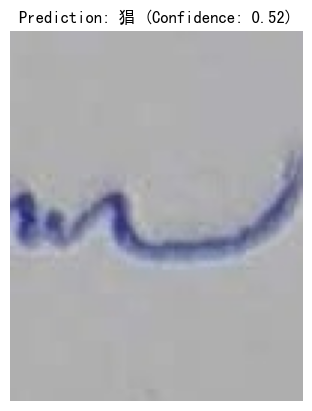

Predicting image: ./Char/img_12.jpg
1/1 [==============================] - 0s 24ms/step
Top 3 predictions: ['冒', '晶', '腊'] with probabilities [0.38956118, 0.14190659, 0.07169216]


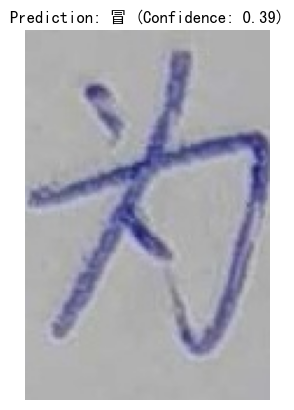

Predicting image: ./Char/img_16.jpg
1/1 [==============================] - 0s 52ms/step
Top 3 predictions: ['冒', '晶', '踏'] with probabilities [0.5981685, 0.13721505, 0.059631016]


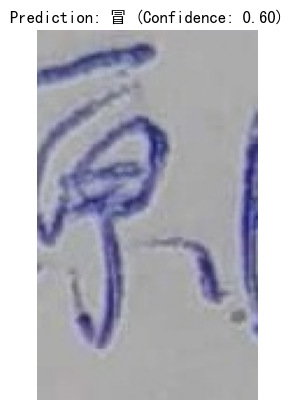

Predicting image: ./Char/img_7.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['服', '盟', '朗'] with probabilities [0.27671245, 0.26570475, 0.07510682]


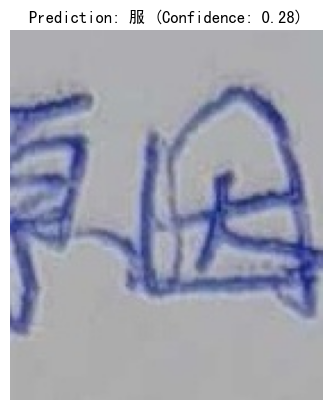

Predicting image: ./Char/img_6.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['晶', '量', '蹋'] with probabilities [0.98511755, 0.0069262907, 0.003183987]


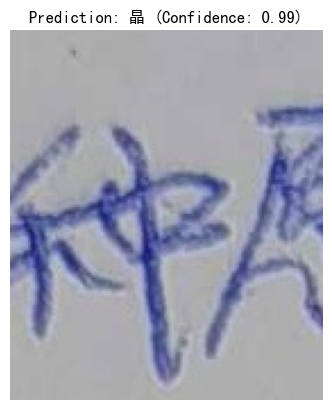

Predicting image: ./Char/img_17.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['冒', '曹', '旬'] with probabilities [0.52626765, 0.12393022, 0.06645813]


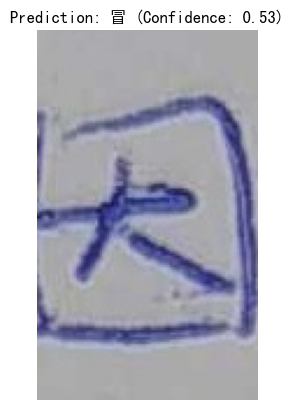

Predicting image: ./Char/img_29.jpg
1/1 [==============================] - 0s 29ms/step
Top 3 predictions: ['一', '冒', '量'] with probabilities [0.5292996, 0.27901444, 0.036493648]


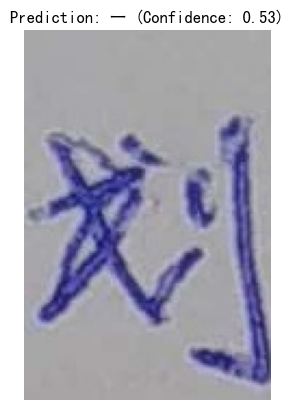

Predicting image: ./Char/img_15.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['晶', '冒', '量'] with probabilities [0.3586035, 0.2718023, 0.15902601]


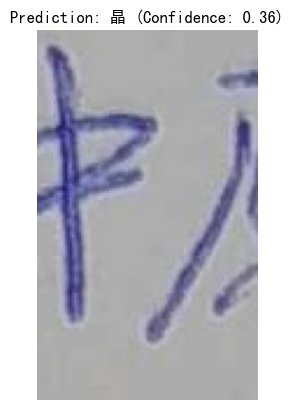

Predicting image: ./Char/img_4.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['晶', '盟', '冒'] with probabilities [0.96055144, 0.02082848, 0.0047811186]


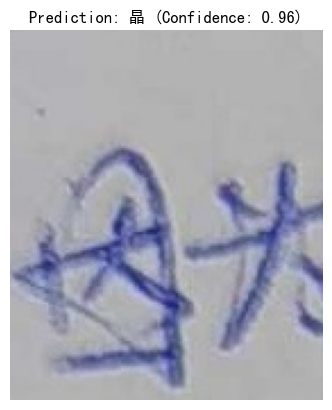

Predicting image: ./Char/img_5.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['昌', '踏', '盟'] with probabilities [0.8010961, 0.07973529, 0.014677795]


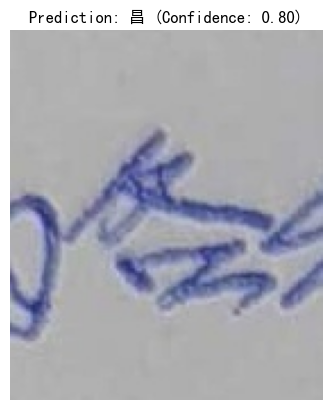

Predicting image: ./Char/img_14.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['冒', '帛', '曾'] with probabilities [0.21166779, 0.10968116, 0.08784825]


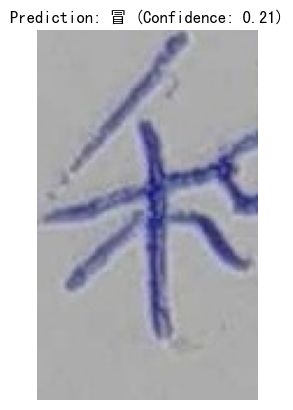

Predicting image: ./Char/img_28.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['一', '量', '昌'] with probabilities [0.3009297, 0.19458506, 0.12853743]


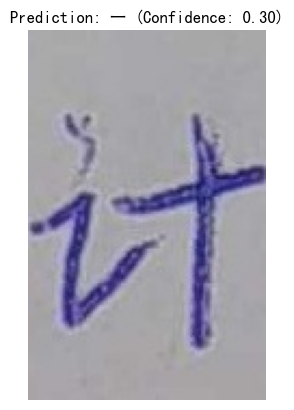

Predicting image: ./Char/img_67.jpg
1/1 [==============================] - 0s 43ms/step
Top 3 predictions: ['蹭', '陌', '曹'] with probabilities [0.36960736, 0.21098271, 0.1001405]


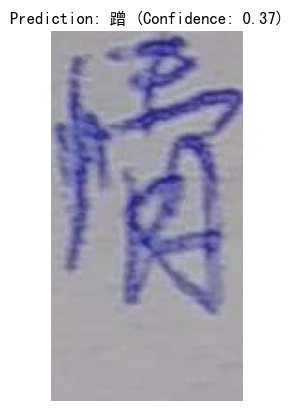

Predicting image: ./Char/img_66.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['冒', '昌', '晶'] with probabilities [0.5614364, 0.20423007, 0.15804474]


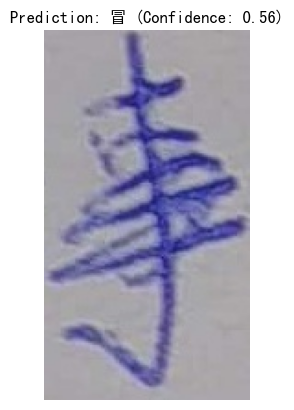

Predicting image: ./Char/img_64.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['昌', '晶', '冒'] with probabilities [0.37064493, 0.22367343, 0.19349566]


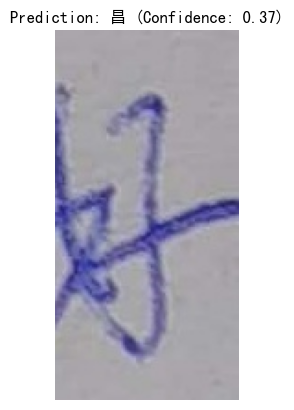

Predicting image: ./Char/img_58.jpg
1/1 [==============================] - 0s 29ms/step
Top 3 predictions: ['晶', '量', '冒'] with probabilities [0.50927866, 0.32639462, 0.053355683]


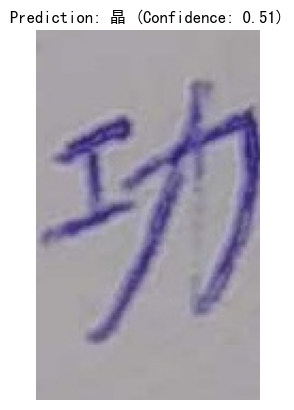

Predicting image: ./Char/img_59.jpg
1/1 [==============================] - 0s 20ms/step
Top 3 predictions: ['一', '蹭', '量'] with probabilities [0.19858262, 0.18254283, 0.12650865]


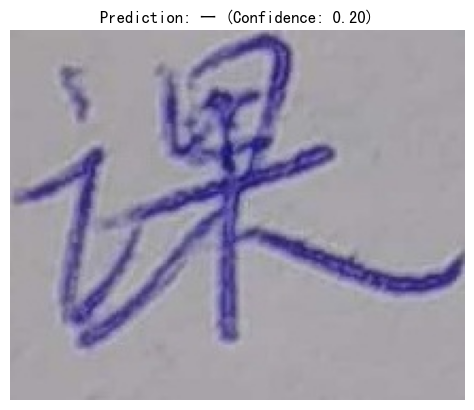

Predicting image: ./Char/img_65.jpg
1/1 [==============================] - 0s 34ms/step
Top 3 predictions: ['晶', '昌', '冒'] with probabilities [0.8991307, 0.04633294, 0.022843977]


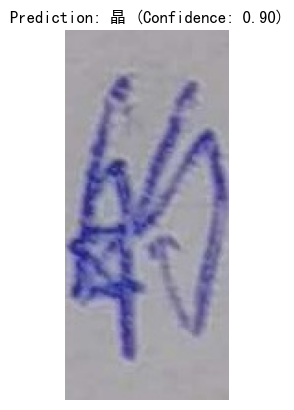

Predicting image: ./Char/img_49.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['冒', '服', '晶'] with probabilities [0.20175414, 0.1739405, 0.09752363]


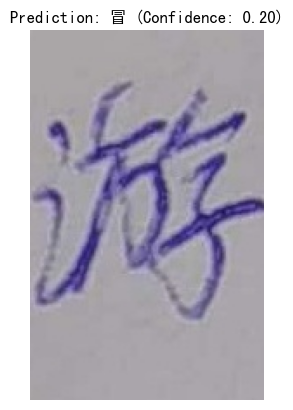

Predicting image: ./Char/img_61.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['驱', '驴', '一'] with probabilities [0.7715912, 0.08578987, 0.059649836]


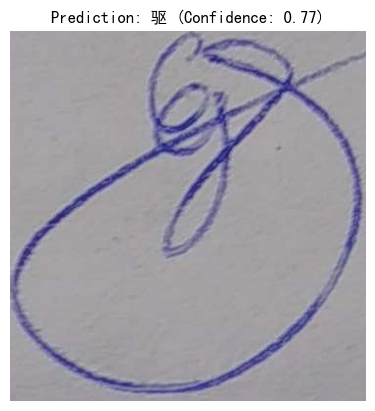

Predicting image: ./Char/img_60.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['昌', '盟', '猖'] with probabilities [0.4680141, 0.17739433, 0.097696215]


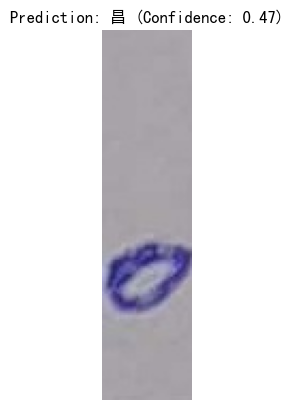

Predicting image: ./Char/img_48.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['晶', '闹', '帚'] with probabilities [0.35498527, 0.20803998, 0.07203709]


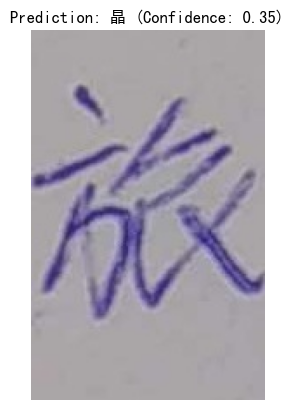

Predicting image: ./Char/img_62.jpg
1/1 [==============================] - 0s 41ms/step
Top 3 predictions: ['晶', '冒', '昌'] with probabilities [0.34864214, 0.20168078, 0.19627793]


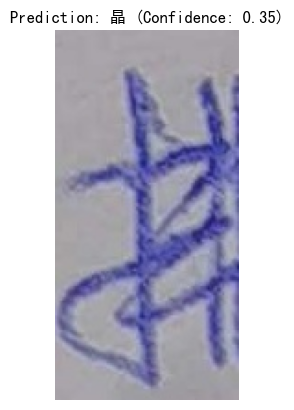

Predicting image: ./Char/img_63.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['猖', '昌', '晶'] with probabilities [0.39630318, 0.24611561, 0.0762253]


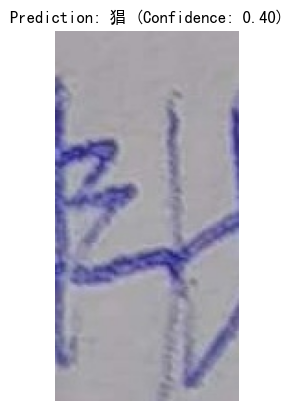

Predicting image: ./Char/img_52.jpg
1/1 [==============================] - 0s 36ms/step
Top 3 predictions: ['踏', '昌', '明'] with probabilities [0.23868084, 0.19937453, 0.16779287]


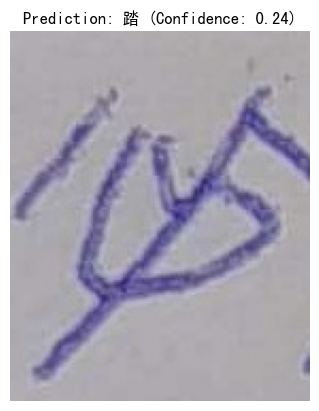

Predicting image: ./Char/img_46.jpg
1/1 [==============================] - 0s 24ms/step
Top 3 predictions: ['晶', '冒', '盟'] with probabilities [0.8347445, 0.097555555, 0.009850164]


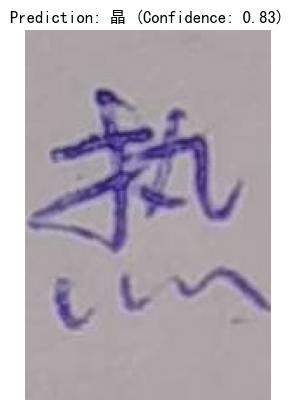

Predicting image: ./Char/img_47.jpg
1/1 [==============================] - 0s 44ms/step
Top 3 predictions: ['冒', '角', '蹭'] with probabilities [0.65913147, 0.1192572, 0.09917349]


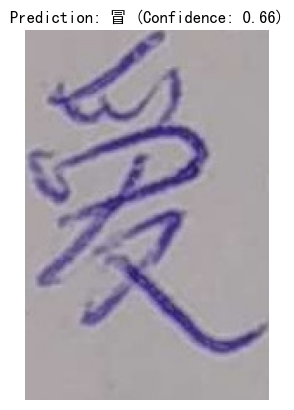

Predicting image: ./Char/img_53.jpg
1/1 [==============================] - 0s 29ms/step
Top 3 predictions: ['勿', '踞', '角'] with probabilities [0.97467405, 0.0032151253, 0.00248645]


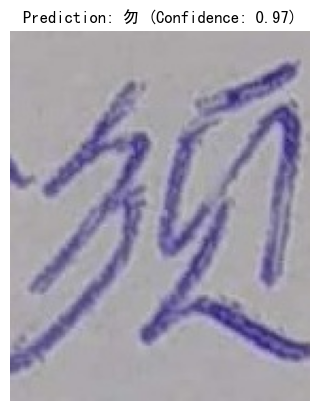

Predicting image: ./Char/img_45.jpg
1/1 [==============================] - 0s 31ms/step
Top 3 predictions: ['冒', '昌', '帽'] with probabilities [0.5230996, 0.14203018, 0.112746194]


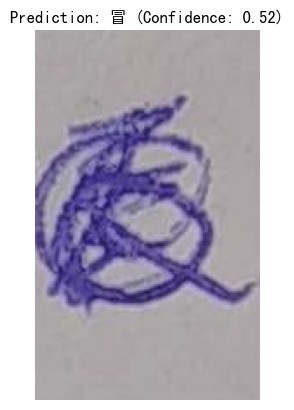

Predicting image: ./Char/img_51.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['猖', '盟', '咒'] with probabilities [0.21854012, 0.12411104, 0.10283602]


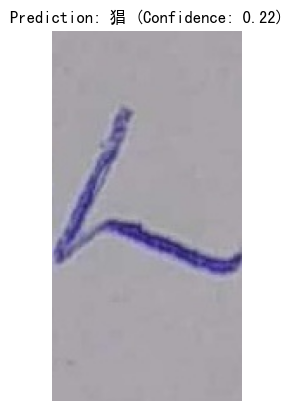

Predicting image: ./Char/img_50.jpg
1/1 [==============================] - 0s 35ms/step
Top 3 predictions: ['量', '嚣', '陨'] with probabilities [0.23097567, 0.20402338, 0.12039829]


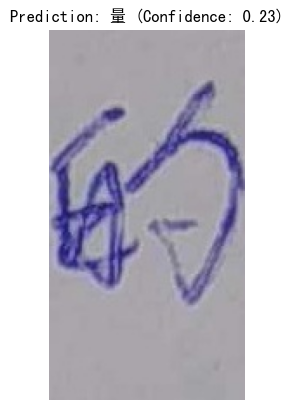

Predicting image: ./Char/img_44.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['旬', '一', '冒'] with probabilities [0.35661322, 0.2605484, 0.1359841]


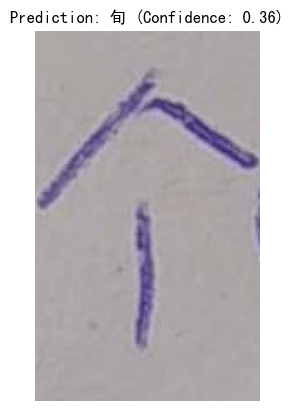

Predicting image: ./Char/img_68.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['一', '昌', '蹭'] with probabilities [0.21323238, 0.10245698, 0.09383983]


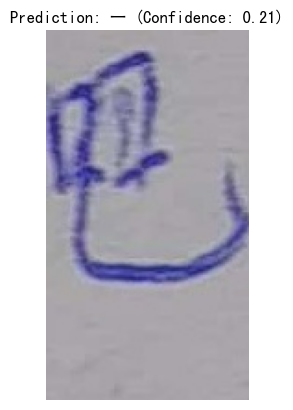

Predicting image: ./Char/img_40.jpg
1/1 [==============================] - 0s 30ms/step
Top 3 predictions: ['昌', '冒', '晶'] with probabilities [0.8224457, 0.06277243, 0.037726074]


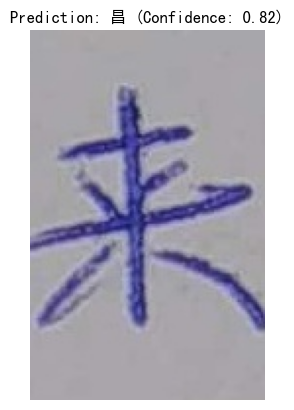

Predicting image: ./Char/img_54.jpg
1/1 [==============================] - 0s 20ms/step
Top 3 predictions: ['昌', '晶', '易'] with probabilities [0.5876653, 0.23391673, 0.11451222]


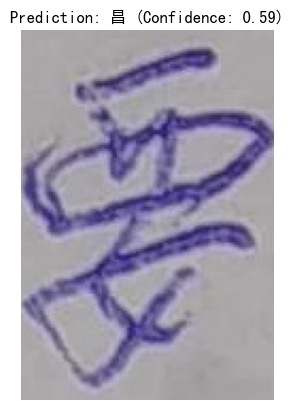

Predicting image: ./Char/img_55.jpg
1/1 [==============================] - 0s 24ms/step
Top 3 predictions: ['晶', '冒', '腊'] with probabilities [0.29151842, 0.11129947, 0.09204147]


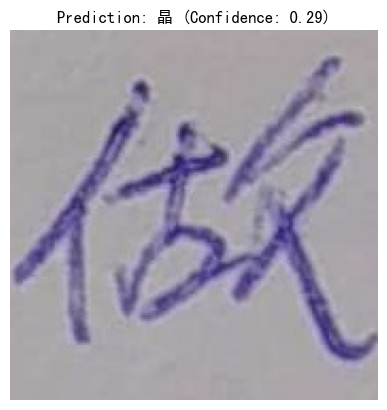

Predicting image: ./Char/img_41.jpg
1/1 [==============================] - 0s 43ms/step
Top 3 predictions: ['昌', '猖', '晶'] with probabilities [0.5929213, 0.11228274, 0.10110094]


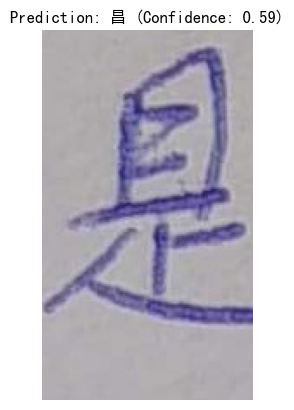

Predicting image: ./Char/img_69.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['盟', '昌', '猖'] with probabilities [0.27649802, 0.25613353, 0.18629608]


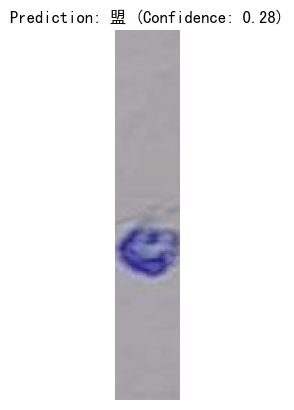

Predicting image: ./Char/img_57.jpg
1/1 [==============================] - 0s 31ms/step
Top 3 predictions: ['晶', '冒', '旬'] with probabilities [0.6733821, 0.28956845, 0.005904023]


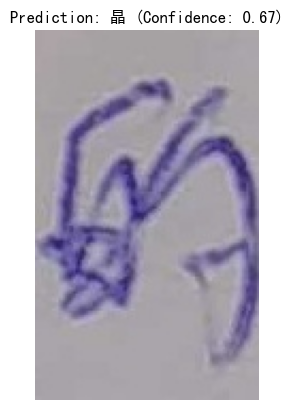

Predicting image: ./Char/img_43.jpg
1/1 [==============================] - 0s 21ms/step
Top 3 predictions: ['一', '猖', '帽'] with probabilities [0.5660776, 0.09368259, 0.07585531]


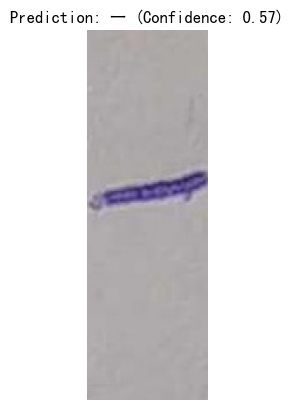

Predicting image: ./Char/img_42.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['易', '蹋', '旬'] with probabilities [0.40723014, 0.16445178, 0.0605874]


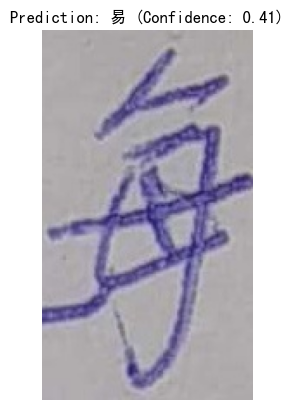

Predicting image: ./Char/img_56.jpg
1/1 [==============================] - 0s 49ms/step
Top 3 predictions: ['晶', '猾', '一'] with probabilities [0.2829175, 0.12792729, 0.097316995]


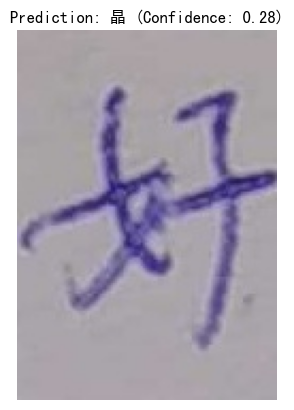

Predicting image: ./Char/img_31.jpg
1/1 [==============================] - 0s 24ms/step
Top 3 predictions: ['冒', '盟', '量'] with probabilities [0.3488705, 0.13609502, 0.09240376]


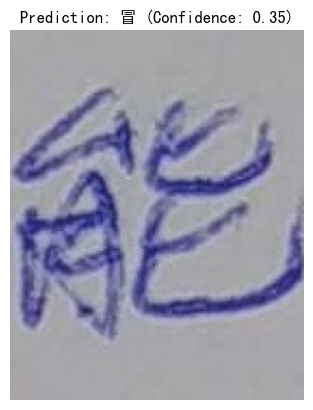

Predicting image: ./Char/img_25.jpg
1/1 [==============================] - 0s 47ms/step
Top 3 predictions: ['晶', '昌', '冒'] with probabilities [0.39351228, 0.1771196, 0.078317344]


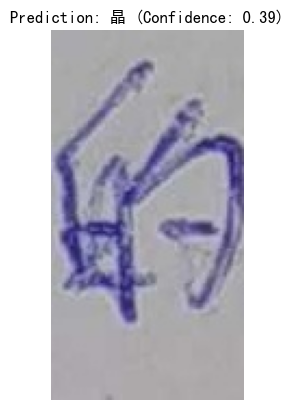

Predicting image: ./Char/img_19.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['驱', '驭', '冒'] with probabilities [0.374318, 0.13957967, 0.07518223]


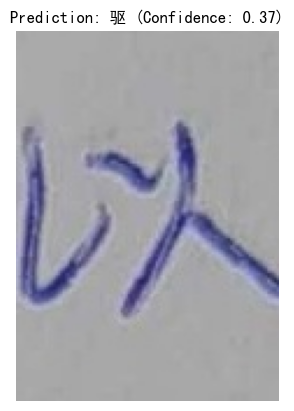

Predicting image: ./Char/img_8.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['猾', '冒', '届'] with probabilities [0.28272438, 0.20118755, 0.1260189]


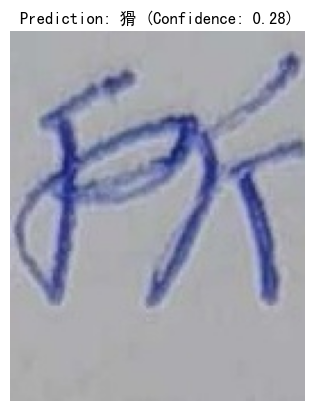

Predicting image: ./Char/img_9.jpg
1/1 [==============================] - 0s 45ms/step
Top 3 predictions: ['脂', '晶', '踏'] with probabilities [0.30737665, 0.15396202, 0.103827104]


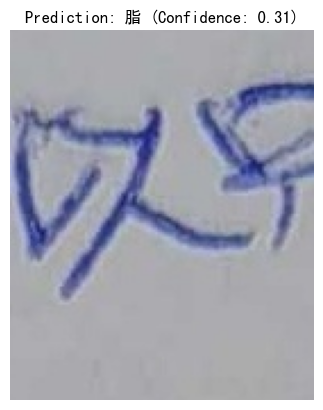

Predicting image: ./Char/img_18.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['猾', '冒', '晶'] with probabilities [0.4258892, 0.20704353, 0.068441465]


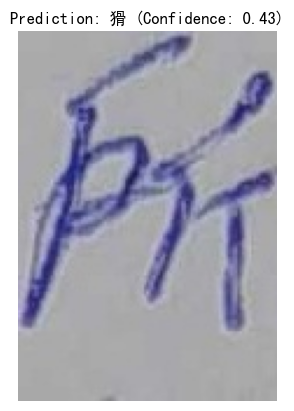

Predicting image: ./Char/img_24.jpg
1/1 [==============================] - 0s 44ms/step
Top 3 predictions: ['晶', '脂', '昌'] with probabilities [0.83276546, 0.074778475, 0.016584309]


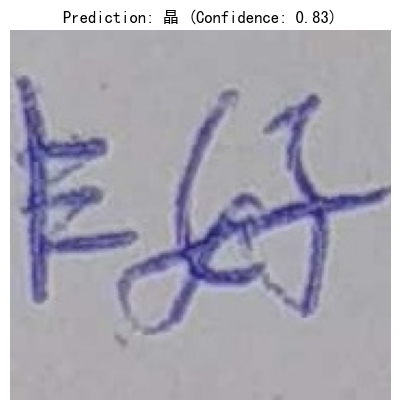

Predicting image: ./Char/img_30.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['冒', '昌', '猾'] with probabilities [0.4142484, 0.18205902, 0.08501572]


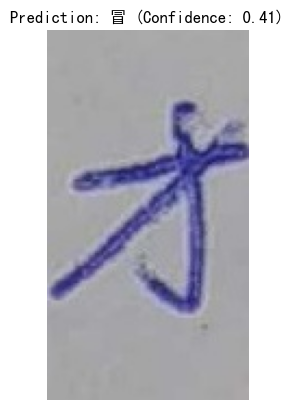

Predicting image: ./Char/img_26.jpg
1/1 [==============================] - 0s 41ms/step
Top 3 predictions: ['服', '届', '晶'] with probabilities [0.15941729, 0.09636015, 0.09370609]


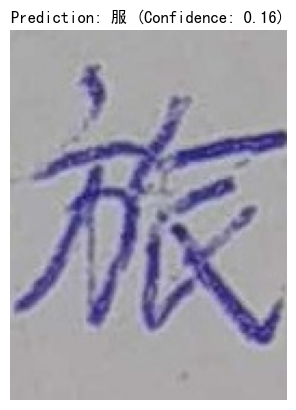

Predicting image: ./Char/img_32.jpg
1/1 [==============================] - 0s 46ms/step
Top 3 predictions: ['晶', '易', '蹋'] with probabilities [0.91127527, 0.041302152, 0.015780872]


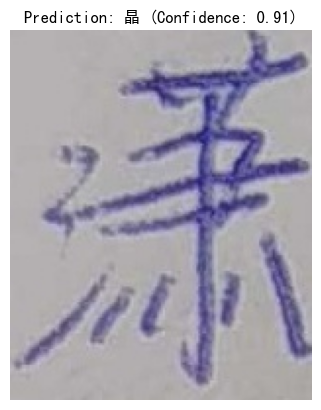

Predicting image: ./Char/img_33.jpg
1/1 [==============================] - 0s 30ms/step
Top 3 predictions: ['服', '脯', '届'] with probabilities [0.80858886, 0.047641084, 0.045794815]


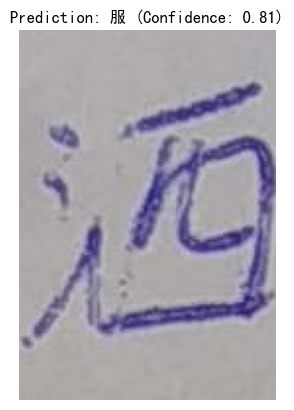

Predicting image: ./Char/img_27.jpg
1/1 [==============================] - 0s 45ms/step
Top 3 predictions: ['冒', '届', '量'] with probabilities [0.67528987, 0.123913705, 0.049686994]


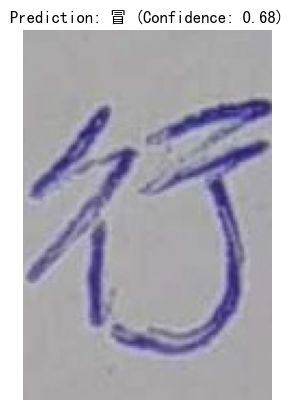

Predicting image: ./Char/img_23.jpg
1/1 [==============================] - 0s 24ms/step
Top 3 predictions: ['晶', '昌', '蹋'] with probabilities [0.98091507, 0.005569959, 0.0021458783]


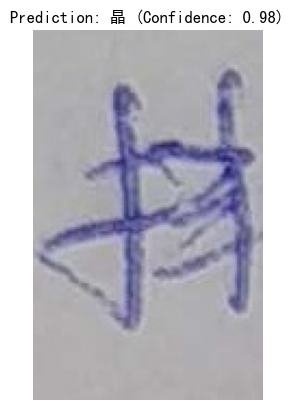

Predicting image: ./Char/img_37.jpg
1/1 [==============================] - 0s 45ms/step
Top 3 predictions: ['冒', '星', '驱'] with probabilities [0.555986, 0.06702504, 0.059760164]


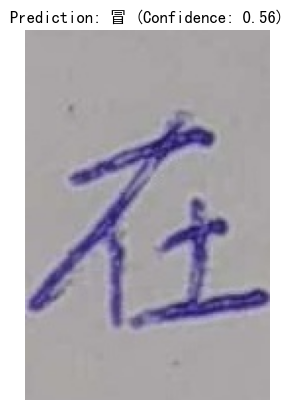

Predicting image: ./Char/img_36.jpg
1/1 [==============================] - 0s 45ms/step
Top 3 predictions: ['歇', '服', '届'] with probabilities [0.3948532, 0.13967969, 0.08689285]


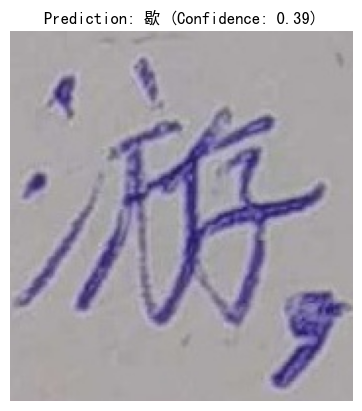

Predicting image: ./Char/img_22.jpg
1/1 [==============================] - 0s 23ms/step
Top 3 predictions: ['富', '蹭', '弱'] with probabilities [0.4826183, 0.060987175, 0.03923313]


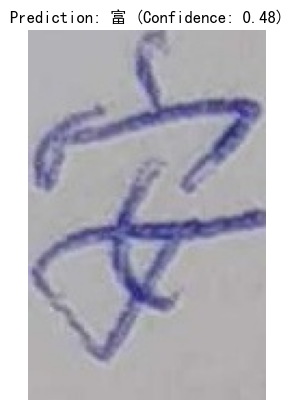

Predicting image: ./Char/img_34.jpg
1/1 [==============================] - 0s 46ms/step
Top 3 predictions: ['猖', '晶', '冒'] with probabilities [0.46309355, 0.12702987, 0.08560071]


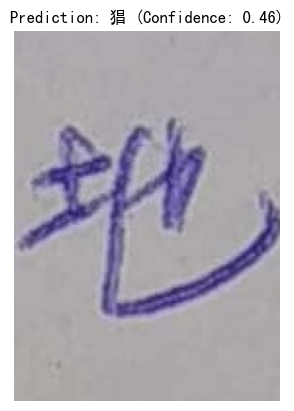

Predicting image: ./Char/img_20.jpg
1/1 [==============================] - 0s 47ms/step
Top 3 predictions: ['冒', '晶', '一'] with probabilities [0.5091054, 0.16397302, 0.15318595]


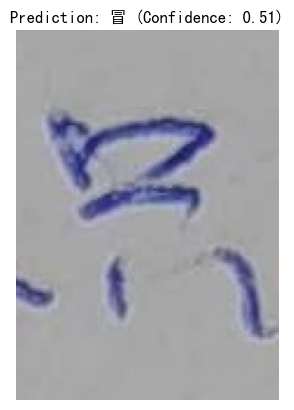

Predicting image: ./Char/img_21.jpg
1/1 [==============================] - 0s 22ms/step
Top 3 predictions: ['冒', '昌', '帽'] with probabilities [0.50343347, 0.08588989, 0.07944513]


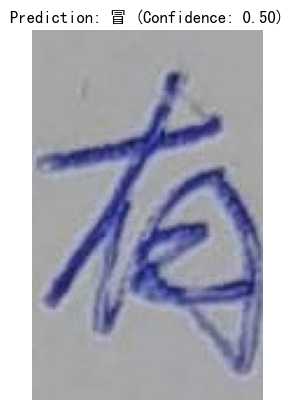

Predicting image: ./Char/img_35.jpg
1/1 [==============================] - 0s 25ms/step
Top 3 predictions: ['歇', '晶', '影'] with probabilities [0.6087039, 0.08706404, 0.07849115]


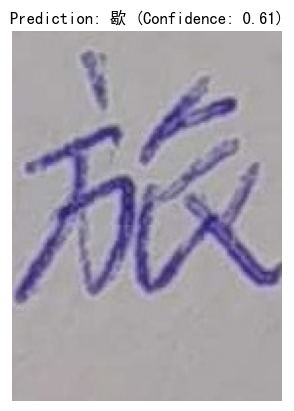

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Définir la taille des images
IMG_SIZE = 224

# Charger le modèle EfficientNetB0
def effcientnetB0_model(num_classes):
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False, input_tensor=inputs, weights=None)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

# Charger les caractères depuis un fichier
def load_characters(characters_file_path):
    with open(characters_file_path, 'r', encoding='utf-8') as file:
        characters = [line.strip() for line in file]
    return characters

# Prétraiter une image pour la prédiction
def preprocess_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=1)  # Décoder en niveaux de gris (1 canal)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionner à 224x224
    img = tf.image.grayscale_to_rgb(img)  # Convertir en RGB pour EfficientNet
    img = tf.expand_dims(img, axis=0)  # Ajouter une dimension batch
    return img


# Prédire une image et afficher les 3 meilleures classes
def predict_image(model, img_path, characters):
    img = preprocess_image(img_path)
    pred = model.predict(img)

    # Afficher les probabilités des premières classes pour le débogage
    top_3 = np.argsort(pred[0])[-3:][::-1]
    print(f"Top 3 predictions: {[characters[i] for i in top_3]} with probabilities {[pred[0][i] for i in top_3]}")

    # Récupérer le label prédit et la confiance
    pred_label = np.argmax(pred, axis=1)[0]
    return characters[pred_label], pred[0][pred_label]

# Visualiser l'image et la prédiction
def display_prediction(img_path, pred_label, confidence):
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {pred_label} (Confidence: {confidence:.2f})')
    plt.axis('off')
    plt.show()

# Fonction principale pour charger les données et effectuer les prédictions
def main():
    # Définir les chemins des images et des caractères
    img_pathdir = "./Char/"
    characters_file_path = "./data/characters.txt"
    
    # Charger la liste de tous les caractères
    characters = load_characters(characters_file_path)
    num_classes = len(characters)

    print(f"Loaded {num_classes} characters.")

    # Charger toutes les images du répertoire
    image_paths = glob.glob(os.path.join(img_pathdir, "*.jpg"))
    print(f"Found {len(image_paths)} images.")

    # Boucler sur chaque image et faire une prédiction
    for img_path in image_paths:
        print(f"Predicting image: {img_path}")
        pred_label, confidence = predict_image(model, img_path, characters)
        display_prediction(img_path, pred_label, confidence)

if __name__ == "__main__":
    main()